<a href="https://colab.research.google.com/github/RashmithaEttadi/EVotingUsingHomomorphicEncryption/blob/main/DSproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

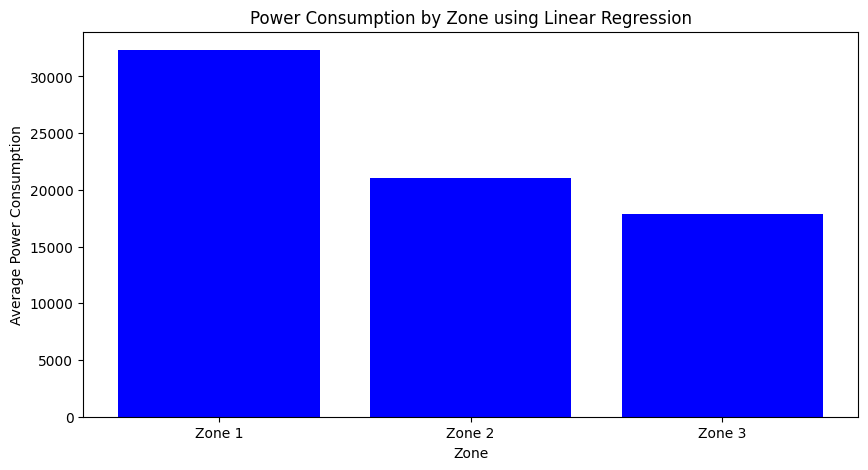

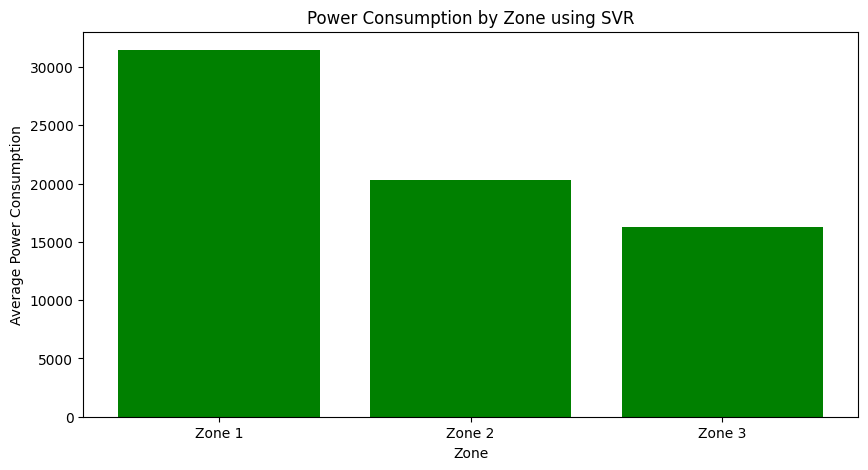

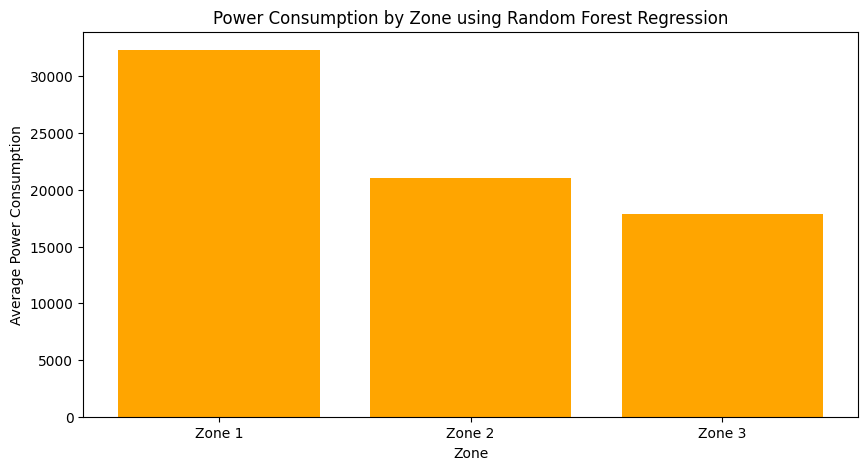

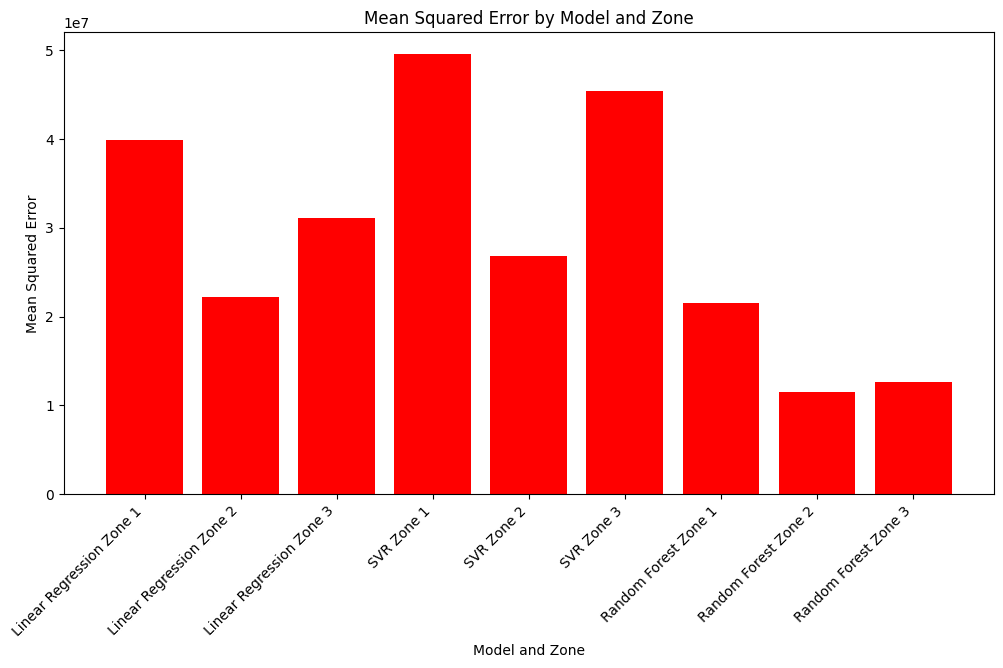

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('Tetuan_City_power_consumption.csv')

# Separate features and target variable
X = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y_zone1 = data['Zone 1 Power Consumption']
y_zone2 = data['Zone 2  Power Consumption']
y_zone3 = data['Zone 3  Power Consumption']

# Split data into training and testing sets
X_train, X_test, y_train_zone1, y_test_zone1 = train_test_split(X, y_zone1, test_size=0.2, random_state=42)
X_train, X_test, y_train_zone2, y_test_zone2 = train_test_split(X, y_zone2, test_size=0.2, random_state=42)
X_train, X_test, y_train_zone3, y_test_zone3 = train_test_split(X, y_zone3, test_size=0.2, random_state=42)

# Define linear regression model
lin_reg = LinearRegression()

# Train linear regression model for Zone 1
lin_reg.fit(X_train, y_train_zone1)
y_pred_zone1_lin = lin_reg.predict(X_test)

# Train linear regression model for Zone 2
lin_reg.fit(X_train, y_train_zone2)
y_pred_zone2_lin = lin_reg.predict(X_test)

# Train linear regression model for Zone 3
lin_reg.fit(X_train, y_train_zone3)
y_pred_zone3_lin = lin_reg.predict(X_test)

# Calculate Mean Squared Error for linear regression model
mse_zone1_lin = mean_squared_error(y_test_zone1, y_pred_zone1_lin)
mse_zone2_lin = mean_squared_error(y_test_zone2, y_pred_zone2_lin)
mse_zone3_lin = mean_squared_error(y_test_zone3, y_pred_zone3_lin)

# Define SVR model
svr = SVR(kernel='rbf')

# Train SVR model for Zone 1
svr.fit(X_train, y_train_zone1)
y_pred_zone1_svr = svr.predict(X_test)

# Train SVR model for Zone 2
svr.fit(X_train, y_train_zone2)
y_pred_zone2_svr = svr.predict(X_test)

# Train SVR model for Zone 3
svr.fit(X_train, y_train_zone3)
y_pred_zone3_svr = svr.predict(X_test)

# Calculate Mean Squared Error for SVR model
mse_zone1_svr = mean_squared_error(y_test_zone1, y_pred_zone1_svr)
mse_zone2_svr = mean_squared_error(y_test_zone2, y_pred_zone2_svr)
mse_zone3_svr = mean_squared_error(y_test_zone3, y_pred_zone3_svr)

# Define Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Random Forest Regression model for Zone 1
rf.fit(X_train, y_train_zone1)
y_pred_zone1_rf = rf.predict(X_test)

# Train Random Forest Regression model for Zone 2
rf.fit(X_train, y_train_zone2)
y_pred_zone2_rf = rf.predict(X_test)

# Train Random Forest Regression model for Zone 3
rf.fit(X_train, y_train_zone3)
y_pred_zone3_rf = rf.predict(X_test)

# Calculate Mean Squared Error for Random Forest Regression model
mse_zone1_rf = mean_squared_error(y_test_zone1, y_pred_zone1_rf)
mse_zone2_rf = mean_squared_error(y_test_zone2, y_pred_zone2_rf)
mse_zone3_rf = mean_squared_error(y_test_zone3, y_pred_zone3_rf)

# Plotting bar charts for power consumption in each zone using Linear Regression
zones = ['Zone 1', 'Zone 2', 'Zone 3']
power_consumption_lin = [np.mean(y_pred_zone1_lin), np.mean(y_pred_zone2_lin), np.mean(y_pred_zone3_lin)]

plt.figure(figsize=(10, 5))
plt.bar(zones, power_consumption_lin, color='blue')
plt.title('Power Consumption by Zone using Linear Regression')
plt.xlabel('Zone')
plt.ylabel('Average Power Consumption')
plt.show()

# Plotting bar charts for power consumption in each zone using SVR
power_consumption_svr = [np.mean(y_pred_zone1_svr), np.mean(y_pred_zone2_svr), np.mean(y_pred_zone3_svr)]

plt.figure(figsize=(10, 5))
plt.bar(zones, power_consumption_svr, color='green')
plt.title('Power Consumption by Zone using SVR')
plt.xlabel('Zone')
plt.ylabel('Average Power Consumption')
plt.show()

# Plotting bar charts for power consumption in each zone using Random Forest Regression
power_consumption_rf = [np.mean(y_pred_zone1_rf), np.mean(y_pred_zone2_rf), np.mean(y_pred_zone3_rf)]

plt.figure(figsize=(10, 5))
plt.bar(zones, power_consumption_rf, color='orange')
plt.title('Power Consumption by Zone using Random Forest Regression')
plt.xlabel('Zone')
plt.ylabel('Average Power Consumption')
plt.show()

# Plotting bar charts for Mean Squared Error of each model
mse_models = [mse_zone1_lin, mse_zone2_lin, mse_zone3_lin, mse_zone1_svr, mse_zone2_svr, mse_zone3_svr,
              mse_zone1_rf, mse_zone2_rf, mse_zone3_rf]
models = ['Linear Regression Zone 1', 'Linear Regression Zone 2', 'Linear Regression Zone 3',
          'SVR Zone 1', 'SVR Zone 2', 'SVR Zone 3',
          'Random Forest Zone 1', 'Random Forest Zone 2', 'Random Forest Zone 3']

plt.figure(figsize=(12, 6))
plt.bar(models, mse_models, color='red')
plt.title('Mean Squared Error by Model and Zone')
plt.xlabel('Model and Zone')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.show()
